In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
kmean=KMeans(n_clusters=3)
kmean.fit(df)

KMeans(n_clusters=3)

In [5]:
kmean.cluster_centers_

array([[3.42331378e+09, 7.43436767e+01, 1.08323308e+01],
       [3.42331112e+09, 7.80328412e+01, 1.03527218e+01],
       [3.42331245e+09, 7.57313469e+01, 1.09811889e+01]])

In [6]:
kmean.labels_

array([2, 0, 0, ..., 2, 0, 1], dtype=int32)

In [7]:
df['labels']=kmean.labels_

In [11]:
df=df.fillna(-1)

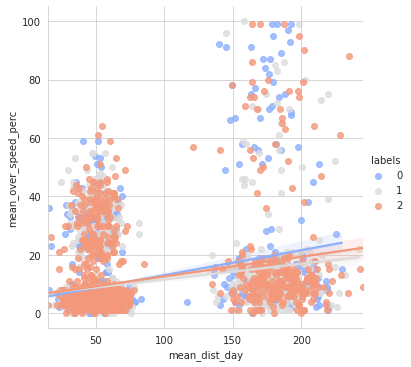

In [14]:
### Plotting the Graph ###
##########################
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df,hue='labels',palette='coolwarm')

In [21]:
from scipy.spatial.distance import cdist

In [22]:
data=df.drop(['labels'],axis=1)

In [24]:
### Chosing K Value

K=range(1,10)
inertia=[]
distortion=[]
for k in K:
    mod=KMeans(n_clusters=k)
    mod.fit(data)
    distortion.append(sum(np.min(cdist(data,mod.cluster_centers_,'euclidean'),axis=1))/data.shape[0])

    inertia.append(mod.inertia_)

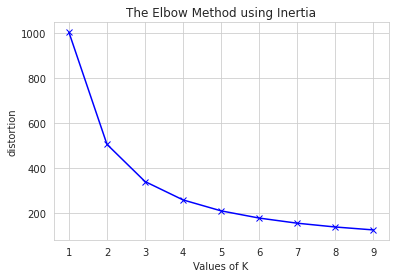

In [26]:
## Plotin graph againest inertia and K values

plt.plot(K,distortion, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('distortion')
plt.title('The Elbow Method using Inertia')
plt.show()